# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Chen Frydman
2.   Ofir Tamir

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [74]:
#imports for 1. Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

#imports for 3. PCA
from sklearn.decomposition import PCA

#imports for 4. PCA & Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# load the data
customer_data = pd.read_csv("./customer_segmentation.csv")

import warnings
warnings.filterwarnings("ignore")

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



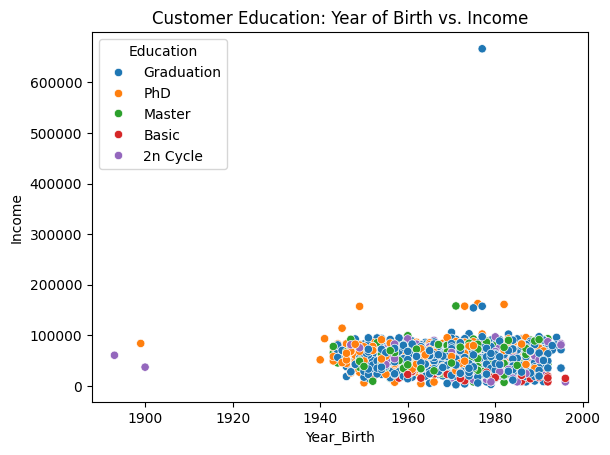

In [75]:
# Graph 1 - Age vs. Spending by Education
sns.scatterplot(x='Year_Birth', y='Income', hue='Education', data=customer_data)
plt.title('Customer Education: Year of Birth vs. Income')
plt.show()

**Insight** - Most people are born between 1940-2000 with the upper bound of the income is 100000

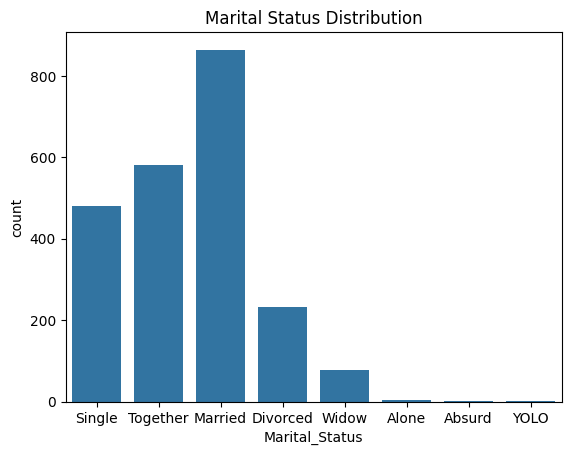

In [76]:
# Graph 2 - Marital Status Distribution
sns.countplot(x='Marital_Status', data=customer_data)
plt.title('Marital Status Distribution')
plt.show()


**Insight** - Most people are Married, and a big part is 'Together' or 'Single'

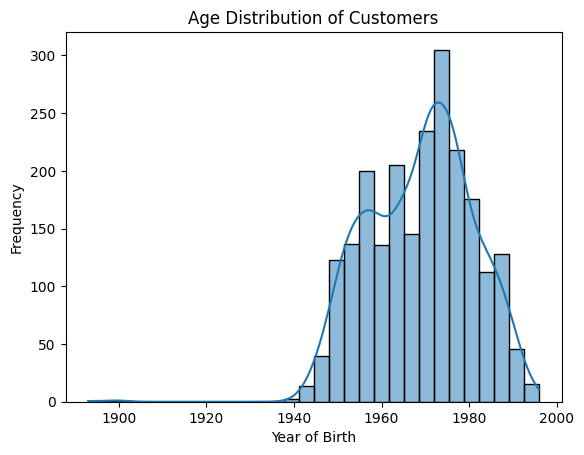

In [77]:
# Graph 3 - Number of Purchases by Campaign Acceptance
sns.histplot(customer_data['Year_Birth'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

**Insight** - This bar shows the peak of the people is around 1970

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [78]:
#transformers date the total number of seconds
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'], format="%d-%m-%Y")
customer_data['Dt_Customer'] = (customer_data['Dt_Customer'] - pd.datetime(1970,1,1)).dt.total_seconds()

#transform all the columns except education and Martial_status with MinMaxScaler
numeric_features = customer_data.drop(['Education', 'Marital_Status'], axis=1).columns.tolist()
numeric_transformer = Pipeline(
    steps = [("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

#transform the categorical columns
categorical_features = ['Education', 'Marital_Status']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="infrequent_if_exist"))
    ]
)

#preprocessor takes it all
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# process data
scaled_features = preprocessor.fit_transform(customer_data)

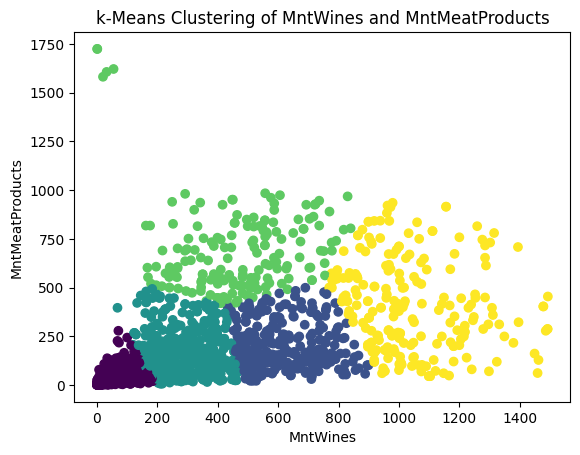

In [94]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5
# Select the features for clustering
selected_features = scaled_features[:, [numeric_features.index('MntWines'), numeric_features.index('MntMeatProducts')]]

# Apply k-Means clustering with n_clusters=5
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(selected_features)

# Visualize the clusters
plt.scatter(customer_data['MntWines'], customer_data['MntMeatProducts'], c=customer_data['Cluster'], cmap='viridis')
plt.title('k-Means Clustering of MntWines and MntMeatProducts')
plt.xlabel('MntWines')
plt.ylabel('MntMeatProducts')
plt.show()

### Elbow

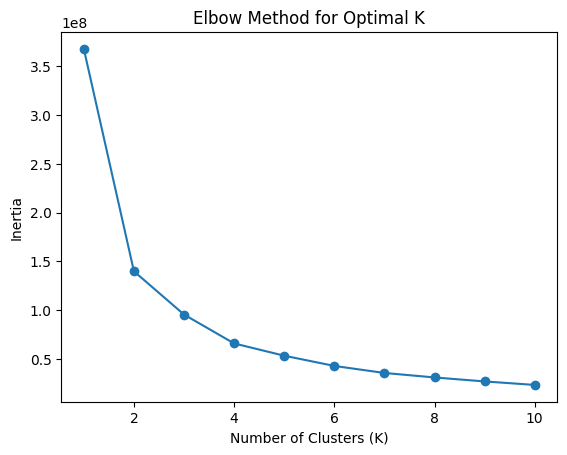

In [81]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(selected_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (K)
optimal_k = 3  # You can change this based on the plot

# Apply k-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(selected_features)

### Silhouette Score

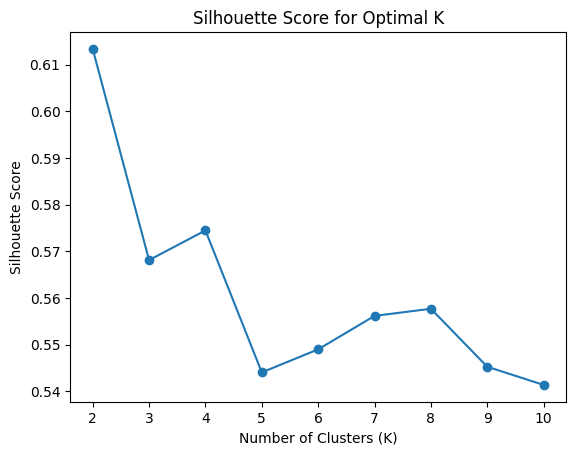

In [82]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(selected_features)
    silhouette_scores.append(silhouette_score(selected_features, cluster_labels))

# Plot the Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

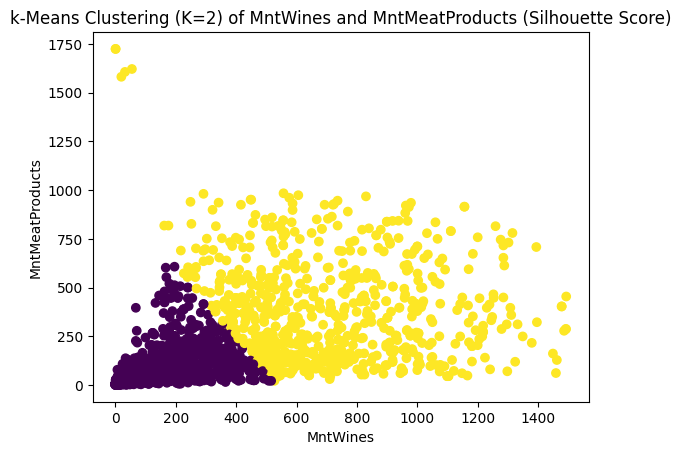

In [83]:


# Based on the Silhouette Score, choose the optimal number of clusters (K)
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because we started the loop from 2

# Apply k-Means clustering with the optimal K according to Silhouette Score
kmeans_silhouette = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
customer_data['Cluster_Silhouette'] = kmeans_silhouette.fit_predict(selected_features)

# Visualize the clusters based on Silhouette Score
plt.scatter(customer_data['MntWines'], customer_data['MntMeatProducts'], c=customer_data['Cluster_Silhouette'], cmap='viridis')
plt.title(f'k-Means Clustering (K={optimal_k_silhouette}) of MntWines and MntMeatProducts (Silhouette Score)')
plt.xlabel('MntWines')
plt.ylabel('MntMeatProducts')
plt.show()

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





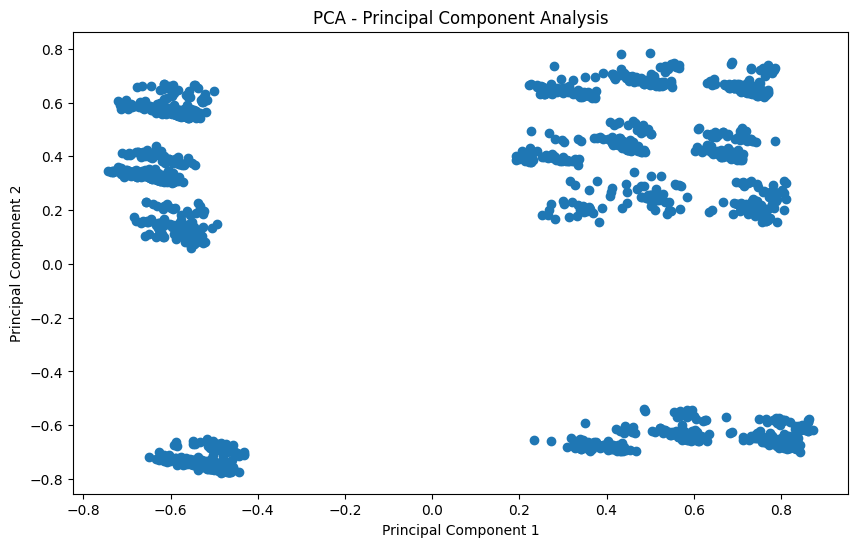

Variance explained by PC1: 13.68%
Variance explained by PC2: 12.90%


In [84]:

# Assuming 'customer_data' is your DataFrame with relevant features

# Adjust n_components as needed
n_components = 2

# Create PCA instance
pca = PCA(n_components=n_components)

# Fit and transform the data
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Plotting the PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[f'PC1'], pca_df[f'PC2'])
plt.title('PCA - Principal Component Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display explained variance
explained_variance_ratio = pca.explained_variance_ratio_
for i in range(n_components):
    print(f"Variance explained by PC{i+1}: {explained_variance_ratio[i]:.2%}")


**Q**: What is the variance explained in the 2 component PCA?

**A**: The variance explained by PC1 is 25.29%, and the variance explained by PC2 is 14.55%

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





In [85]:
# Assuming 'pca_df' is your DataFrame with principal components from the previous PCA analysis
# Fit and transform the data

pca_data = principal_components



### Elbow

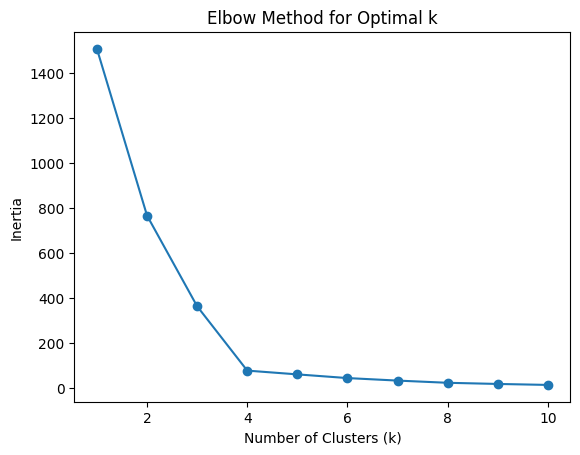

In [86]:
# Find the best k for kmeans using Elbow method
inertia_values = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow method
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



### Silhouette

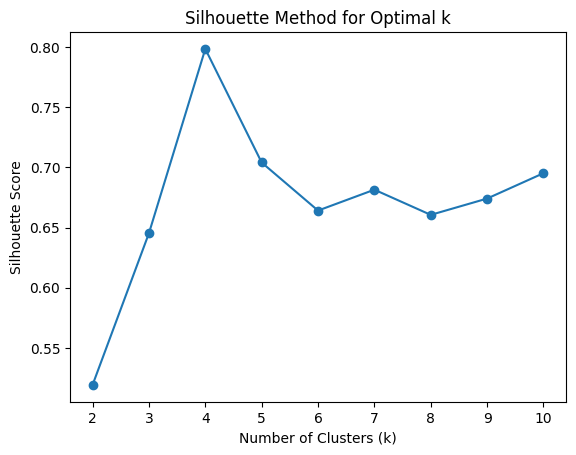

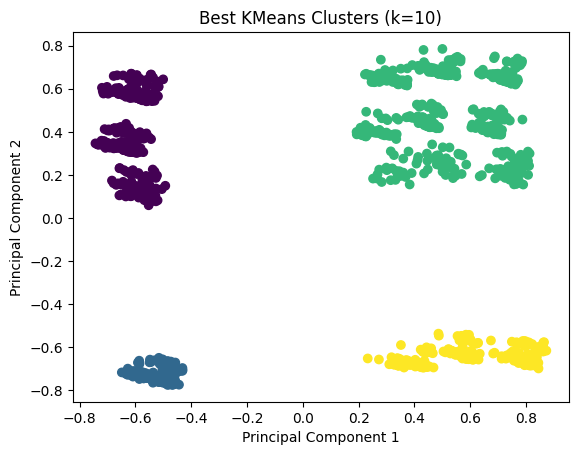

In [87]:
# Find the best k for kmeans using Silhouette method
silhouette_scores = []

for k in possible_k_values[1:]:  # Skip k=1 for Silhouette score
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette method
plt.plot(possible_k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the Elbow and Silhouette methods, choose the best k
best_k_elbow = possible_k_values[inertia_values.index(min(inertia_values))]
best_k_silhouette = possible_k_values[silhouette_scores.index(max(silhouette_scores))]+1 #+1 becuase of offset

# Plot the best clusters
best_kmeans = KMeans(n_clusters=best_k_silhouette, random_state=42)
best_cluster_labels = best_kmeans.fit_predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_cluster_labels, cmap='viridis')
plt.title(f'Best KMeans Clusters (k={best_k_elbow})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:In our human eye, it may appear that we need 5 clusters, but both the Elbow and Silhouette methods are suggesting 2 clusters.
This discrepancy could be due to the nature of the data or the underlying patterns captured by the principal components.
KMeans relies on distance-based metrics, and if the clusters in the high-dimensional space (before PCA) are not well-separated,
the algorithm might not identify distinct clusters even after dimensionality reduction. Additionally, the chosen features for
PCA and KMeans may not align with the visual clustering perceived by the human eye. It's crucial to consider the characteristics
of the data and the assumptions of the algorithms when interpreting results.


## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











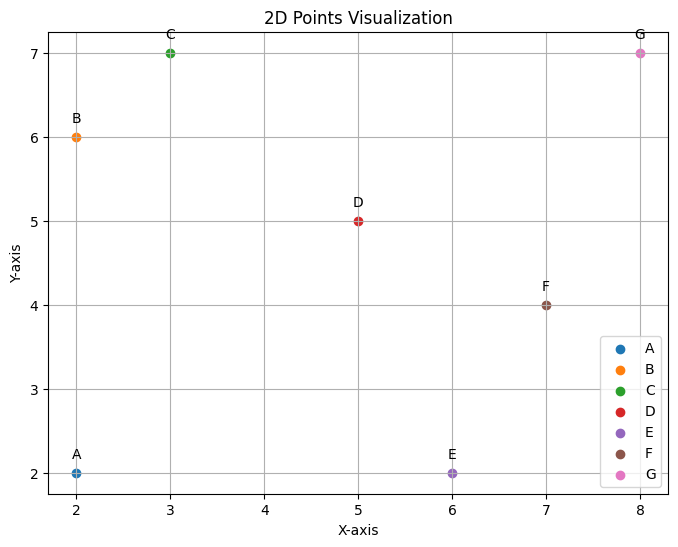

In [88]:
# Given points
points = {'A': (2, 2), 'B': (2, 6), 'C': (3, 7), 'D': (5, 5), 'E': (6, 2), 'F': (7, 4), 'G': (8, 7)}

# Plotting the points
plt.figure(figsize=(8, 6))
for point, coords in points.items():
    plt.scatter(coords[0], coords[1], label=point)

# Labeling the points
for point, coords in points.items():
    plt.annotate(point, coords, textcoords="offset points", xytext=(0,10), ha='center')

plt.title('2D Points Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:
1. I chose points (C,G,E) and I got the clusters (B,C),(G,F),(E,D,A)
2. Yes, choosing different initial cluster centers can lead to different final clusters. The K-means algorithm is sensitive to the initial placement of cluster centers. Different starting points may result in different local optima, impacting the final clustering outcome.
3. It's possible to detect anomalies in the medical world using k-means. Using k-means we can outline the special cases and maybe perform more tests on them.


## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

In [89]:
"https://drive.google.com/uc?id=1a_6GPqg7RwUxHeijsIiyBmAAX7mCbGfu"

'https://drive.google.com/uc?id=1a_6GPqg7RwUxHeijsIiyBmAAX7mCbGfu'